# Load Libraries

In [88]:
# Dataset can be found at: "https://www.kaggle.com/datasets/bobnau/daily-website-visitors"
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
sns.set_style("whitegrid")

from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# Làm Sạch Dữ Liệu

Đổi tên cột, loại bỏ các bản sao, kiểm tra các dữ liệu bị thiếu, xóa dấu phẩy khỏi các cột, chuyển đổi loại dữ liệu, kiểm tra các giá trị null nếu có, kiểm tra các giá trị trùng lặp nếu có.

In [89]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('websitedata.csv')

# Xóa dấu phẩy khỏi các cột
df = df.replace(',','', regex = True)

# Đổi tên các cột
df.rename(columns = {'Day.Of.Week': 'day_of_week'
                    ,'Date': 'date' 
                    ,'Page.Loads': 'page_loads'
                    ,'Unique.Visits': 'unique_visits'
                    ,'First.Time.Visits': 'first_time_visits'
                    ,'Returning.Visits': 'returning_visits'}, inplace = True)

# Chuyển đổi các loại dữ liệu
df["date"] = pd.to_datetime(df["date"])
df['page_loads'] = df['page_loads'].astype(int)
df['unique_visits'] = df['unique_visits'].astype(int)
df['first_time_visits'] = df['first_time_visits'].astype(int)
df['returning_visits'] = df['returning_visits'].astype(int)

df.head()


,Row,Day,day_of_week,date,page_loads,unique_visits,first_time_visits,returning_visits
0,1,Sunday,1,2014-09-14,2146,1582,1430,152
1,2,Monday,2,2014-09-15,3621,2528,2297,231
2,3,Tuesday,3,2014-09-16,3698,2630,2352,278
3,4,Wednesday,4,2014-09-17,3667,2614,2327,287
4,5,Thursday,5,2014-09-18,3316,2366,2130,236


In [90]:
# Loại bỏ các bản sao
df.drop_duplicates(inplace = True)

In [91]:
# Xóa cột "Row"
df.drop('Row', axis = 1, inplace = True)

In [92]:
# Xử lý dữ liệu bị thiếu
df.dropna(inplace = True)

In [93]:
# Kiểm tra các giá trị null nếu có
df.isna().sum()

Day                  0
day_of_week          0
date                 0
page_loads           0
unique_visits        0
first_time_visits    0
returning_visits     0
dtype: int64

In [94]:
# Kiểm tra các giá trị trùng lặp nếu có
df.duplicated().sum()

0

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 0 to 2166
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Day                2167 non-null   object        
 1   day_of_week        2167 non-null   int64         
 2   date               2167 non-null   datetime64[ns]
 3   page_loads         2167 non-null   int32         
 4   unique_visits      2167 non-null   int32         
 5   first_time_visits  2167 non-null   int32         
 6   returning_visits   2167 non-null   int32         
dtypes: datetime64[ns](1), int32(4), int64(1), object(1)
memory usage: 101.6+ KB


Lưu thành file csv mới

In [96]:
df.to_csv('new_data_website.csv', index = False)

# Khai Phá Dữ Liệu

Thiết lập biểu đồ đường để trực quan hóa xu hướng tải trang và sự truy cập theo chuỗi thời gian

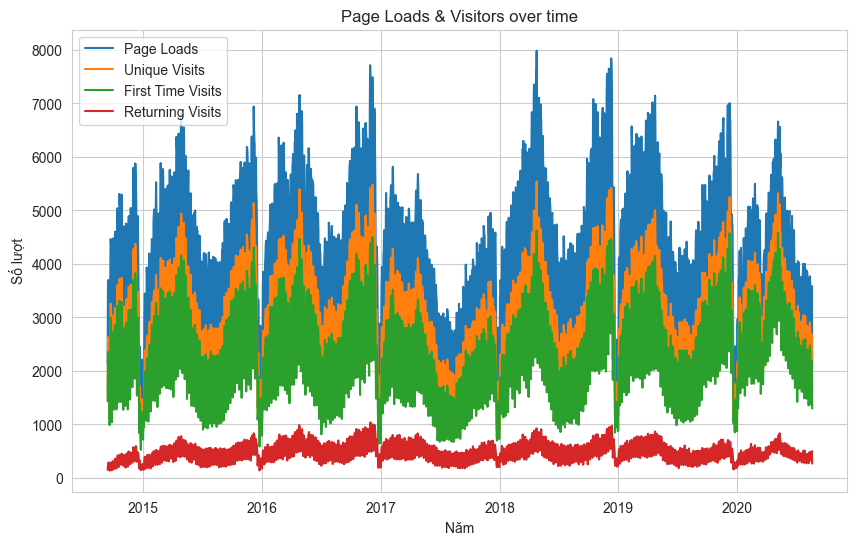

In [97]:

# Thiết lập kích thước biểu đồ
plt.figure(figsize = (10, 6))

# Vẽ biểu đồ đường cho cột "date" và "page_loads"
plt.plot(df["date"], df["page_loads"], label = "Page Loads")

# Vẽ biểu đồ đường cho cột "date" và "unique_visits"
plt.plot(df["date"], df["unique_visits"], label = "Unique Visits")

# Vẽ biểu đồ đường cho cột "date" và "first_time_visits"
plt.plot(df["date"], df["first_time_visits"], label = "First Time Visits")

# Vẽ biểu đồ đường cho cột "date" và "returning_visits"
plt.plot(df["date"], df["returning_visits"], label = "Returning Visits")

# Thiết lập tiêu đề và nhãn trục
plt.title("Page Loads & Visitors over time")
plt.xlabel("Năm")
plt.ylabel("Số lượt")

# Chú thích
plt.legend()

plt.show()

# Phân Tích Đơn Biến

Sử dụng Histogram plot để trực quan hóa rõ hơn về từng biến

1.Page Loads

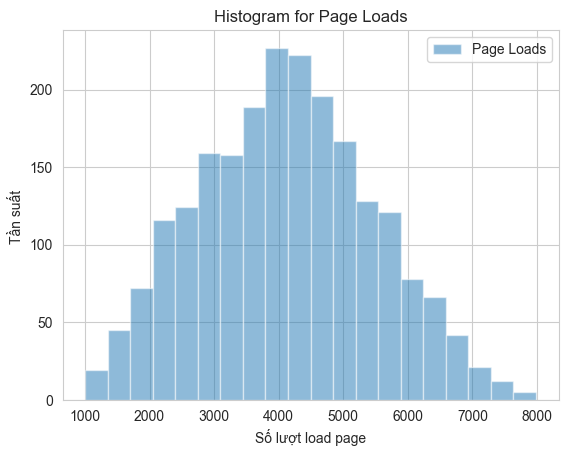

In [98]:
# Vẽ histogram plot cho cột "page_loads"
plt.hist(df["page_loads"], bins = 20, alpha = 0.5, label = "Page Loads")
plt.title("Histogram for Page Loads")
plt.xlabel("Số lượt load page")
plt.ylabel("Tần suất ")

# Chú thích
plt.legend()

plt.show()

2.Unique Visits

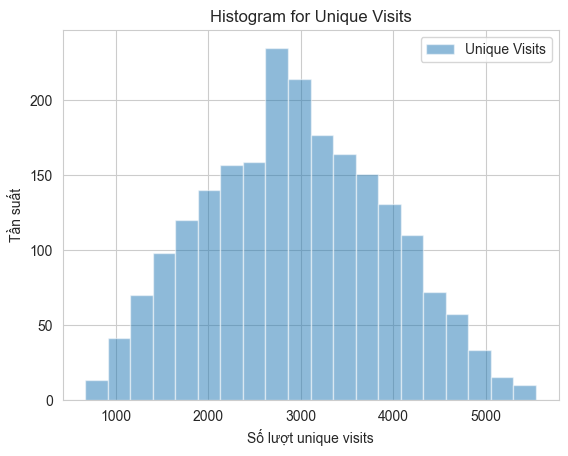

In [99]:
# Vẽ histogram plot cho cột "unique_visits"
plt.hist(df["unique_visits"], bins = 20, alpha = 0.5, label = "Unique Visits")
plt.title("Histogram for Unique Visits")
plt.xlabel("Số lượt unique visits")
plt.ylabel("Tần suất")

# Chú thích
plt.legend()

plt.show()

3.First Visits

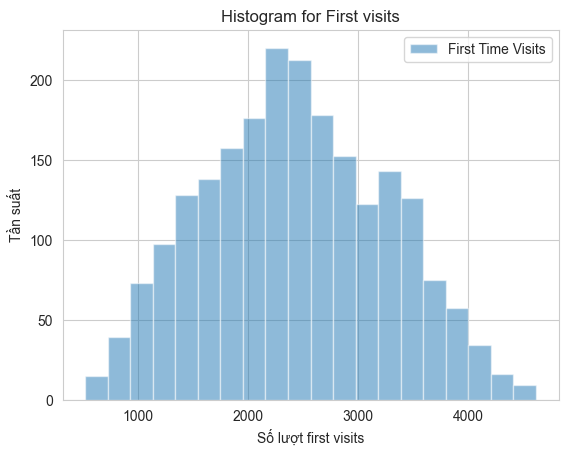

In [100]:
# Vẽ histogram plot cho cột "first_time_visits"
plt.hist(df["first_time_visits"], bins = 20, alpha = 0.5, label = "First Time Visits")
plt.title("Histogram for First visits")
plt.xlabel("Số lượt first visits")
plt.ylabel("Tần suất")

# Chú thích
plt.legend()

plt.show()

4.Returning Visits

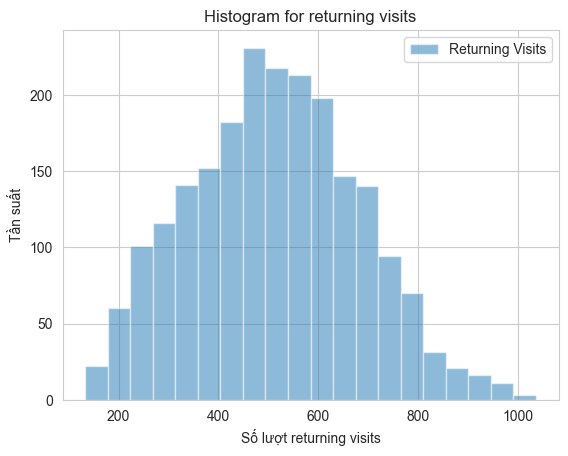

In [101]:
# Vẽ histogram plot cho cột "returning_visits"
plt.hist(df["returning_visits"], bins = 20, alpha = 0.5, label = "Returning Visits")
plt.title("Histogram for returning visits")
plt.xlabel("Số lượt returning visits")
plt.ylabel("Tần suất")

# Chú thích
plt.legend()

plt.show()

* Sử dụng bar chart để trực quan hóa về tổng số lượt 'page_loads', 'unique_visits', 'first_time_visits', 'returning_visits' cho từng ngày

1. Tính tổng số lượt 'page_loads', 'unique_visits', 'first_time_visits', 'returning_visits' cho từng ngày

In [102]:
Total = df.groupby('Day')[['page_loads', 'unique_visits', 'first_time_visits', 'returning_visits']].sum().sort_values(by = 'Day')
print(Total)

           page_loads  unique_visits  first_time_visits  returning_visits
Day                                                                      
Friday        1149437         817852             668805            149047
Monday        1502161        1072112             886036            186076
Saturday       772817         552105             456449             95656
Sunday        1006564         725794             604198            121596
Thursday      1437269        1028214             848921            179293
Tuesday       1536154        1097181             907752            189429
Wednesday     1517114        1085624             897602            188022


2. Trực quan hóa với bar chart

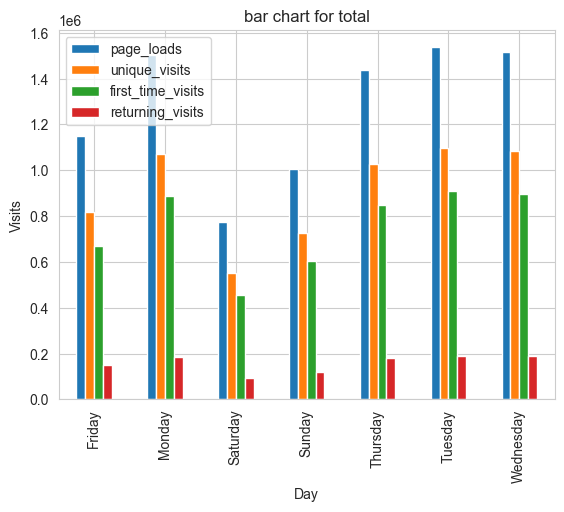

In [103]:
# Vẽ bar chart
Total.plot(kind = 'bar')
plt.title("bar chart for total")
plt.xlabel("Day")
plt.ylabel("Visits")

# Chú thích
plt.legend()

plt.show()

* Tính toán giá trị trung bình, trung vị và độ lệch chuẩn cho các biến số 

1. Page Loads

In [104]:
mean_page_loads = np.mean(df["page_loads"])
median_page_loads = np.median(df["page_loads"])
std_page_loads = np.std(df["page_loads"])

# In kết quả
print("Giá trị trung bình:", mean_page_loads)
print("Trung vị:", median_page_loads)
print("Độ lêch chuẩn:", std_page_loads)

Giá trị trung bình: 4116.9893862482695
Trung vị: 4106.0
Độ lêch chuẩn: 1350.6660905687318


2. Unique visits

In [105]:
mean_unique_visits = np.mean(df["unique_visits"])
median_unique_visits = np.median(df["unique_visits"])
std_unique_visits = np.std(df["unique_visits"])

# In kết quả
print("Giá trị trung bình:", mean_unique_visits)
print("Trung vị:", median_unique_visits)
print("Độ lêch chuẩn:", std_unique_visits)

Giá trị trung bình: 2943.6465159206277
Trung vị: 2914.0
Độ lêch chuẩn: 977.6608147885687


3. First time visits

In [106]:
mean_first_time_visits = np.mean(df["first_time_visits"])
median_first_time_visits = np.median(df["first_time_visits"])
std_first_time_visits = np.std(df["first_time_visits"])

# In kết quả
print("Giá trị trung bình:", mean_first_time_visits)
print("Trung vị:", median_first_time_visits)
print("Độ lêch chuẩn:", std_first_time_visits)

Giá trị trung bình: 2431.824180895247
Trung vị: 2400.0
Độ lêch chuẩn: 828.5134557648674


4. Returning visits

In [107]:
mean_returning_visits = np.mean(df["returning_visits"])
median_returning_visits = np.median(df["returning_visits"])
std_returning_visits = np.std(df["returning_visits"])

# In kết quả
print("Giá trị trung bình:", mean_returning_visits)
print("Trung vị:", median_returning_visits)
print("Độ lêch chuẩn:", std_returning_visits)

Giá trị trung bình: 511.8223350253807
Trung vị: 509.0
Độ lêch chuẩn: 168.69743191398112


* Tính toán bảng tần số cho các cột và vẽ biểu đồ

In [108]:

# Tính toán bảng tần số cho các cột "page_loads", "unique_visits", "first_time_visits" và "returning_visits"
page_loads_freq = df["page_loads"].value_counts().head(10)
unique_visits_freq = df["unique_visits"].value_counts().head(10)
first_time_visits_freq = df["first_time_visits"].value_counts().head(10)
returning_visits_freq = df["returning_visits"].value_counts().head(10)

# Kết hợp các bảng tần số thành một DataFrame duy nhất
freq_df = pd.concat([page_loads_freq, unique_visits_freq, first_time_visits_freq, returning_visits_freq], axis = 1, keys = ["page_loads", "unique_visits", "first_time_visits", "returning_visits"])

print(freq_df)


      page_loads  unique_visits  first_time_visits  returning_visits
2948         5.0            NaN                NaN               NaN
3973         4.0            NaN                NaN               NaN
3795         4.0            NaN                NaN               NaN
4205         4.0            NaN                NaN               NaN
3456         4.0            NaN                NaN               NaN
4376         4.0            NaN                NaN               NaN
4029         4.0            NaN                NaN               NaN
3906         4.0            NaN                NaN               NaN
2344         4.0            NaN                NaN               NaN
4638         4.0            NaN                NaN               NaN
2780         NaN            5.0                NaN               NaN
3039         NaN            5.0                NaN               NaN
1197         NaN            5.0                NaN               NaN
2667         NaN            5.0   

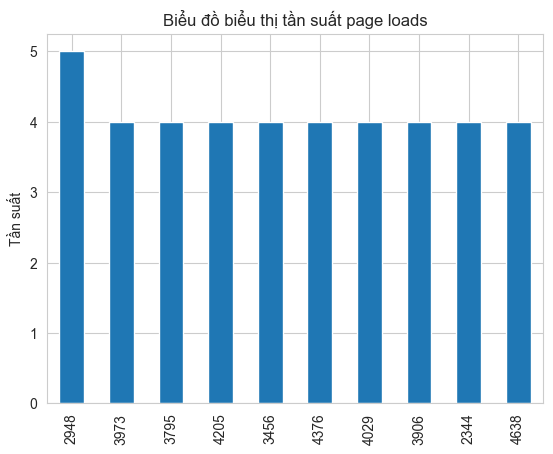

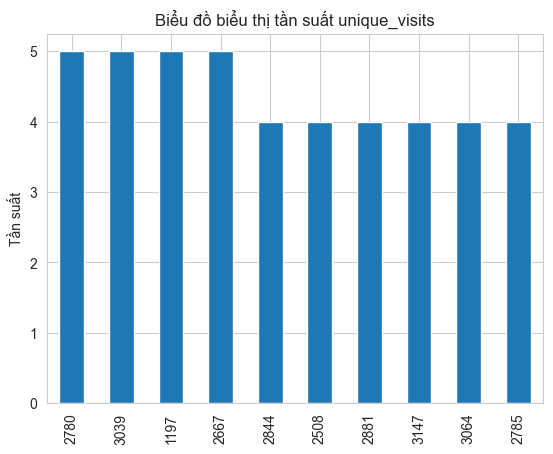

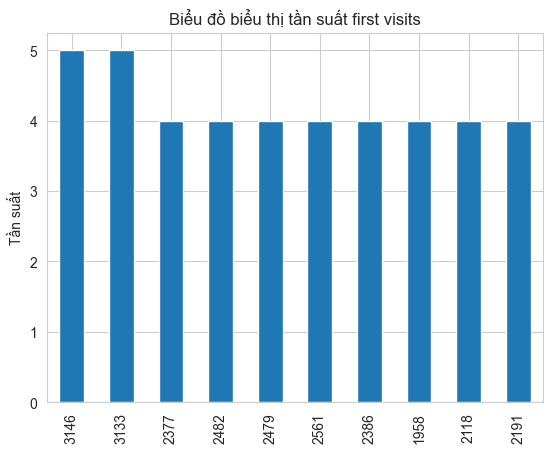

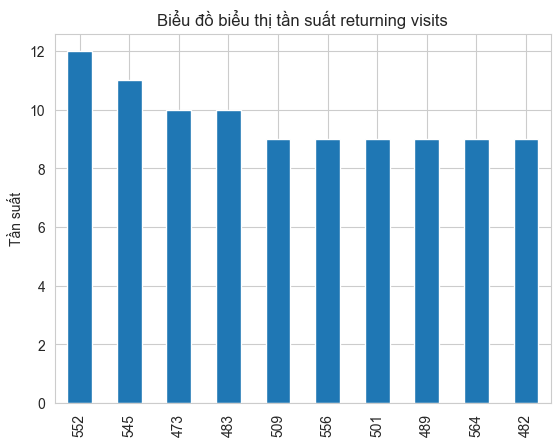

In [109]:
# Vẽ biểu đồ
page_loads_freq.plot(kind = "bar", legend = None)
plt.title("Biểu đồ biểu thị tần suất page loads")
plt.ylabel("Tần suất")
plt.show()

unique_visits_freq.plot(kind = "bar", legend = None) 
plt.title("Biểu đồ biểu thị tần suất unique_visits")
plt.ylabel("Tần suất")
plt.show()

first_time_visits_freq.plot(kind = "bar", legend = None)
plt.title("Biểu đồ biểu thị tần suất first visits")
plt.ylabel("Tần suất")
plt.show()

returning_visits_freq.plot(kind = "bar", legend = None)
plt.title("Biểu đồ biểu thị tần suất returning visits")
plt.ylabel("Tần suất")
plt.show()

# Ma Trận Tương Quan

Sử dụng hàm corr() rồi sau đó trựa quan hóa với heatmap plot

In [110]:
# tính toán ma trận tương quan giữa các cột
corr_matrix = df.corr()

print(corr_matrix)

                   day_of_week  page_loads  unique_visits  first_time_visits  \
day_of_week           1.000000   -0.253006      -0.255127          -0.256785   
page_loads           -0.253006    1.000000       0.988691           0.980704   
unique_visits        -0.255127    0.988691       1.000000           0.996164   
first_time_visits    -0.256785    0.980704       0.996164           1.000000   
returning_visits     -0.217418    0.913340       0.902950           0.861882   

                   returning_visits  
day_of_week               -0.217418  
page_loads                 0.913340  
unique_visits              0.902950  
first_time_visits          0.861882  
returning_visits           1.000000  


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24380\1702564686.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


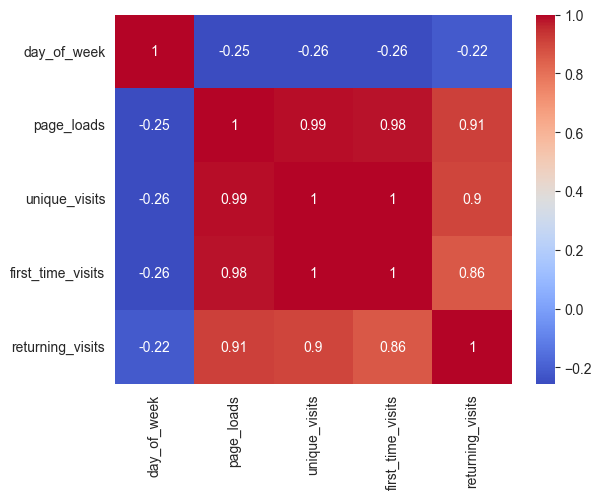

In [111]:
# vẽ heatmap plot
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')

# hiển thị biểu đồ
plt.show()

# Phát Hiện Ngoại Lệ

Ta sử dụng scatter plot để có thể xác định các giá trị cực đoan

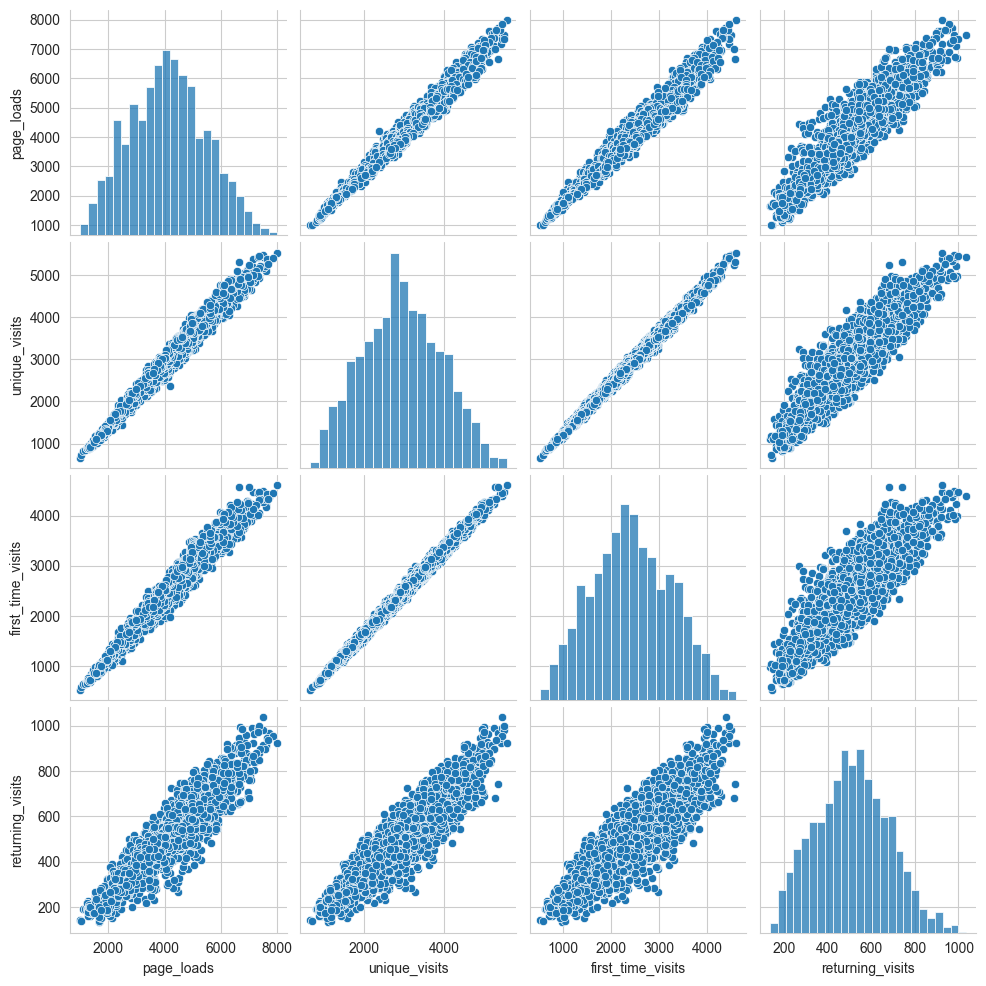

In [112]:
# Tạo 1 Dataframe mới với 4 cột để vẽ scatter plot
df_scatter = df[['page_loads', 'unique_visits', 'first_time_visits', 'returning_visits']]

# vẽ biểu đồ phân tán giữa các cặp biến
sns.pairplot(df_scatter, kind = 'scatter')

# hiển thị biểu đồ
plt.show()

# Xác Định Hành Vi Người Dùng

Sử dụng thuật toán K-means để xác định các mẫu hành vi của người dùng

Ở đây muốn tìm hiểu xem liệu có mối quan hệ giữa "page_loads" với "first_time_visits" hay ko?!

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


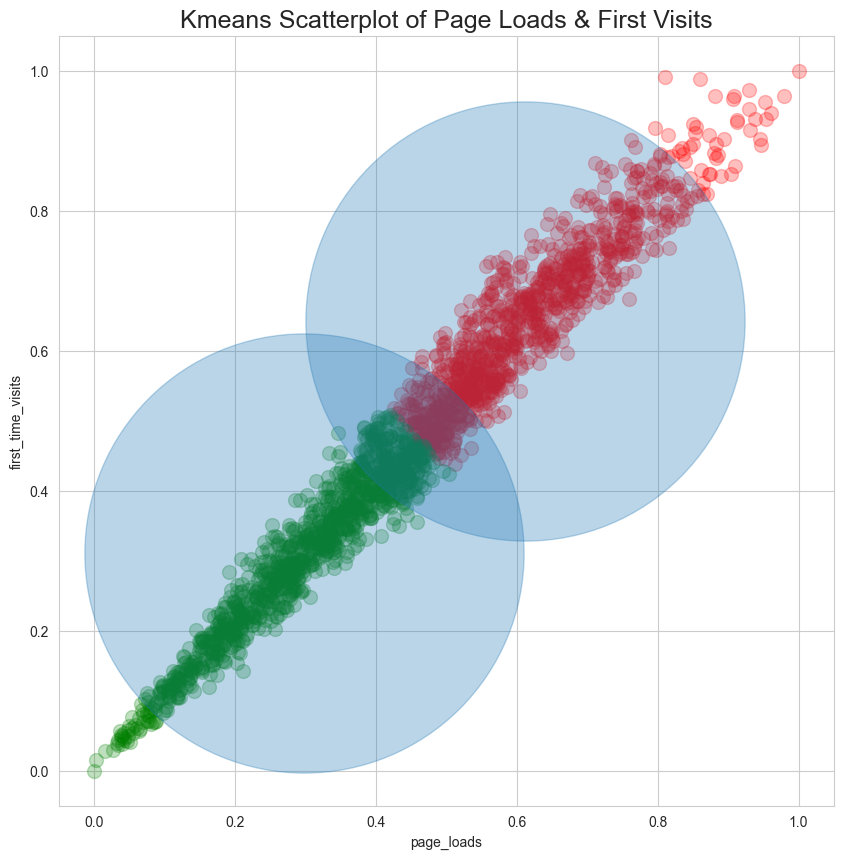

In [113]:
# Set các biến X và Y 
col_X = 'page_loads'
col_Y = 'first_time_visits'

# Set giá trị trung bình và độ lệch chuẩn
X_mean = mean_page_loads
X_std = std_page_loads

Y_mean = mean_first_time_visits
Y_std = std_first_time_visits

# Tính toán các giá trị chuẩn hóa trên X và Y
X_min = min(df[col_X])
X_max = max(df[col_X])

norm_X = ((df[col_X] - X_min) / (X_max - X_min))
df['norm_X'] = norm_X

Y_min = min(df[col_Y])
Y_max = max(df[col_Y])

norm_Y = ((df[col_Y] - Y_min) / (Y_max - Y_min))
df['norm_Y'] = norm_Y


# Create K-means Crutters
X_Y = np.column_stack((df['norm_X'], df['norm_Y']))

kmeans = KMeans(n_clusters = 2).fit(X_Y)
clusters = kmeans.cluster_centers_

df['cluster'] = kmeans.labels_
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]

# Build Scatter Plot vs Kmeans
figure(num = None, figsize = (10, 10), dpi = 100, facecolor = 'w', edgecolor = 'k')

plt.xlabel(col_X)
plt.ylabel(col_Y)

plt.scatter(df1.norm_X, df1.norm_Y, alpha = 0.25, s = 100, color = 'red')
plt.scatter(df2.norm_X, df2.norm_Y, alpha = 0.25, s = 100, color = 'green')
plt.title("Kmeans Scatterplot of Page Loads & First Visits", fontsize = 18)
plt.scatter(clusters[:,0], clusters[:,1], s = 100000, alpha = 0.30)


# Xây Dựng Phát Triển Mô Hình

Sử dụng thuật toán hồi quy tuyến tính trong thư viện Sklearn để dự báo lưu lượng người dùng tuy cập lại vào trang Web

In [114]:
df_model = pd.read_csv('new_data_website.csv', usecols = ['page_loads', 'unique_visits', 'first_time_visits', 'returning_visits'])

# Chia features và target
X = df_model.drop(['returning_visits'], axis = 1)
y = df_model['returning_visits']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Khởi tạo mô hình
lr = LinearRegression()

# Huấn luyện mô hình trên tập huấn luyện
lr.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = lr.predict(X_test)

# Đánh giá mô hình 
print('mse: %.2f' % mean_squared_error(y_test, y_pred))
print('r2_score: %.2f' % r2_score(y_test, y_pred))

mse: 0.00
r2_score: 1.00


Mô hình hóa mô hình trên bằng line plot

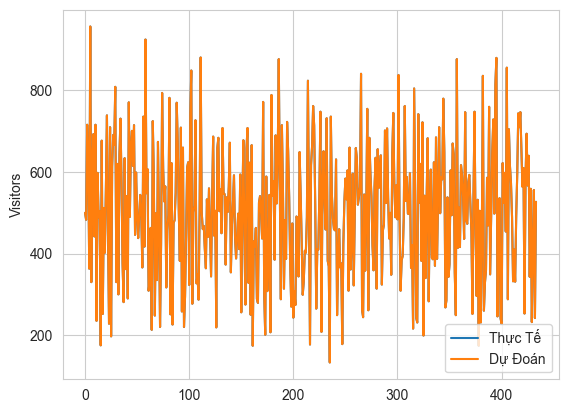

In [115]:

# Tạo Line Plot
plt.plot(y_test.values, label = 'Thực Tế')
plt.plot(y_pred, label = 'Dự Đoán')
plt.ylabel('Visitors')
plt.legend()
plt.show()